# Домашнее задание по теме: пакет `pandas` (описательная статистика)

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

!pip -V

pip 20.2.4 from G:\ProgramData\Anaconda3\lib\site-packages\pip (python 3.8)



In [2]:
# !conda install pandas numpy -y
# !conda install matplotlib -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.1.3'

## Загрузка данных

[Источник (Amazon Top 50 Bestselling Books 2009 - 2019)](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019)

ВНИМАНИЕ: Предварительно датасет необходимо скачать к себе на локальный компьютер.

In [5]:
# загрузить датасет в pandas dataframe
df = pd.read_csv('bestsellers with categories.csv')

# вывести первые 5 и последние 5 строк
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [6]:
# получить сведения о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [7]:
# получить список колонок (тип list)
df.columns.tolist()

['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']

In [8]:
# сколько элементов в каждом столбце имеют значение NA
df.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

Далее в заданиях **желательно использовать средства пакета `pandas`** или несколько вариантов.

In [9]:
# вычислить среднее значение стобца Price
avg_points = df.Price.mean()
avg_points

13.1

In [10]:
# вычислить медиану стобца Price
med = df.Price.median()
med

11.0

In [11]:
# получить минимальное значение столбца Price
minimal = df.Price.min()
minimal

0

In [12]:
# получить максимальное значение столбца Price
maximal = df.Price.max()
maximal

105

In [13]:
# получить моду столбца Price
moda = df.Price.mode()[0]
moda

8

In [14]:
# получить квантили (25, 50, 75) столбца Price
df.Price.quantile([.25, .5, .75])

0.25     7.0
0.50    11.0
0.75    16.0
Name: Price, dtype: float64

<AxesSubplot:>

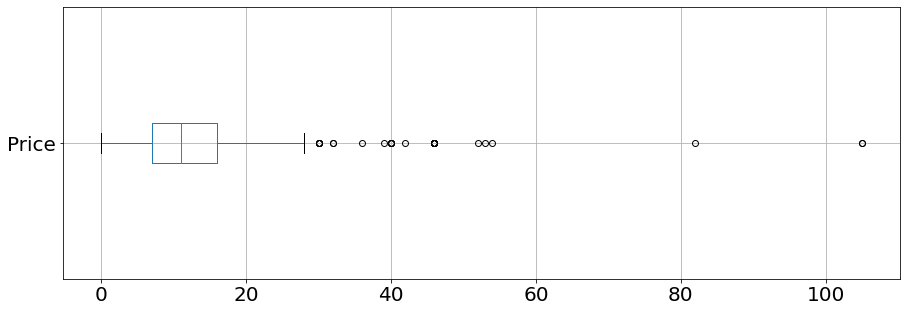

In [16]:
# отобразить горизонтальный boxplot по стобцу Price
df.boxplot(column='Price', vert=False, figsize=(15, 5), fontsize=20)

In [17]:
# получить размах выборки для столбца Price
price_range = df.Price.max() - df.Price.min()

price_range

105

In [18]:
# получить среднеквадратическое отклонения для столбца Price
df.Price.std()

10.84226197842238

In [19]:
# получить дисперсию для столбца Price
df.Price.var()

117.55464480874357

<AxesSubplot:>

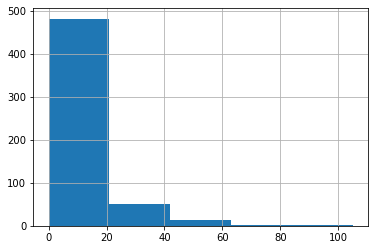

In [21]:
# отобразить гистограмму для значений столбца Price (bins=5)
df.Price.hist(bins=5)

<AxesSubplot:>

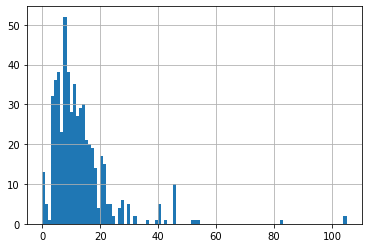

In [22]:
# отобразить гистограмму для значений столбца Price (bins=100)
df.Price.hist(bins=100)

Какой можно сделать вывод? Имеется ли ассиметрия?

Да, преимущественно позитивная Ассиметрия.

In [23]:
# получить стандартную оценку среднего для столбца Price
df.Price.sem()

0.46231560414296985

<AxesSubplot:ylabel='Density'>

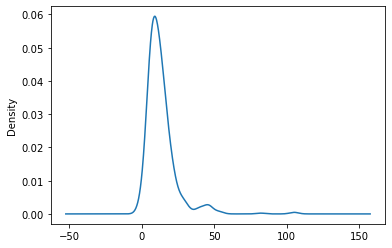

In [25]:
# отобразить ядерную оценку плотности для столбца Price
df.Price.plot.kde()

Похожа ли ЯОП на гистрограмму?

Похожа

In [26]:
# вычислить интерквартильный размах (IQR) для столбца Price
Q1 = df.Price.quantile(0.25)
Q3 = df.Price.quantile(0.75)
IQR = Q3 - Q1

IQR

9.0

In [27]:
# получить среднее абсолютное отклонение для столбца Price
df.Price.mad()

6.697090909090893

In [31]:
# отобразить основные параметры описательной статистики
# для столбца Price
df.Price.describe()

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: Price, dtype: float64

In [32]:
# отобразить основные параметры описательной статистики
# для столбца User Rating
df['User Rating'].describe()

count    550.000000
mean       4.618364
std        0.226980
min        3.300000
25%        4.500000
50%        4.700000
75%        4.800000
max        4.900000
Name: User Rating, dtype: float64

In [33]:
# отобразить основные параметры описательной статистики
# для всех столбцов
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [34]:
# отобразить основные параметры описательной статистики
# для всех столбцов содержащих тип object
df.describe(include=["object"])

,Name,Author,Genre
count,550,550,550
unique,351,248,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,12,310


In [35]:
# получить все уникальные значения из столбца Genre
df.Genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [36]:
# получить моду для столбца Author
moda = df.Author.mode()[0]
moda

'Jeff Kinney'

In [45]:
# сколько книг в данном датасете с этим автором?
df[(df.Author == moda)].Name.count()

12

In [46]:
# вывести все данные из датасета по этому автору, т.е.
# все его книги и полное описание к ним
# (индекс, наименование, автор, рейтинг, отзывы, цена, год и жанр)
df[(df.Author == moda)]

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
73,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22,2014,Fiction
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
88,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20,2016,Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
435,The Meltdown (Diary of a Wimpy Kid Book 13),Jeff Kinney,4.8,5898,8,2018,Fiction
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction


In [47]:
# сколько книг написаны в жанре Fiction
df[(df.	Genre == 'Fiction')].Name.count()

240

In [48]:
# сколько книг написаны в жанре Non Fiction
df[(df.	Genre == 'Non Fiction')].Name.count()

310

<AxesSubplot:>

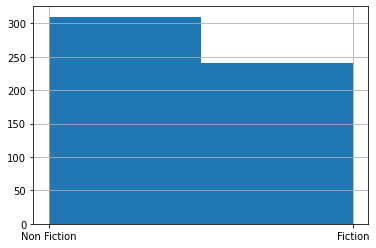

In [50]:
# отобразить гистрограмму для столбца Genre
df.Genre.hist(bins=2)